In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/prash/Desktop/Amazon/Data/Cleaned/amazon_laptops_cleaned_public.csv")

df["satisfied"] = pd.to_numeric(df["satisfied"], errors="coerce")
df.loc[~df["satisfied"].isin([0, 1]), "satisfied"] = pd.NA
df["satisfied"].value_counts(dropna=False)




satisfied
1.0    152
0.0     83
NaN      2
Name: count, dtype: int64

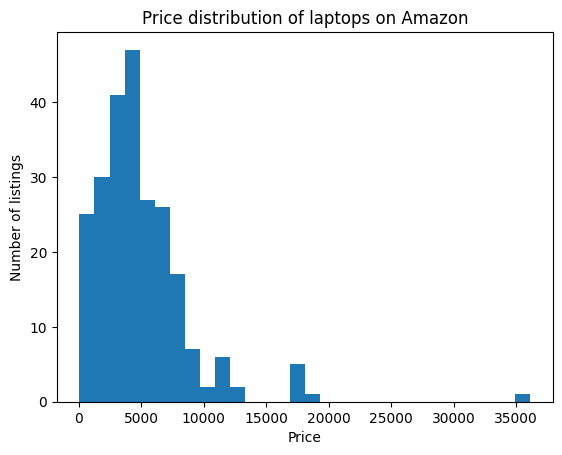

In [3]:
#Price distribution chart

df["price"].plot(kind="hist", bins=30)
plt.title("Price distribution of laptops on Amazon")
plt.xlabel("Price")
plt.ylabel("Number of listings")
plt.show()


### Insight: Overall price distribution

Laptop prices on Amazon are heavily right-skewed, with most listings concentrated in the lower to mid-price range and a small premium segment at the upper end. This suggests a mass-market platform where high-end products represent a minority of listings.


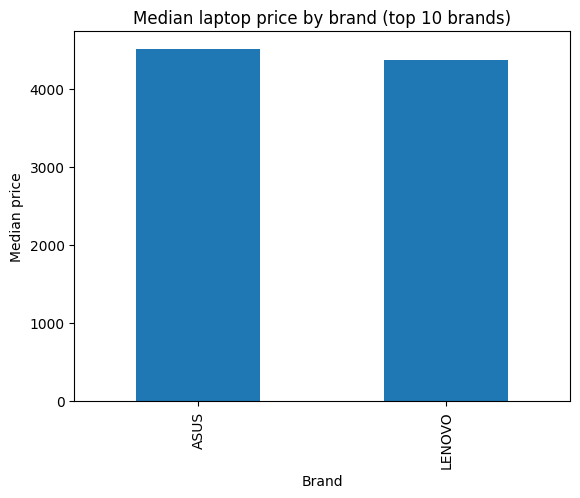

In [4]:
#Brand vs Price

top_brands = df["brand"].value_counts().head(10).index

brand_price = (
    df[df["brand"].isin(top_brands)]
    .groupby("brand")["price"]
    .median()
    .sort_values(ascending=False)
)

brand_price.plot(kind="bar")
plt.title("Median laptop price by brand (top 10 brands)")
plt.xlabel("Brand")
plt.ylabel("Median price")
plt.show()


### Insight: Brand-level price positioning

Among brands with sufficient listings, median prices cluster within a similar range, indicating comparable positioning in the mid-range laptop market. This highlights brand identity as a contributor to pricing, but not a sole differentiator in this segment.


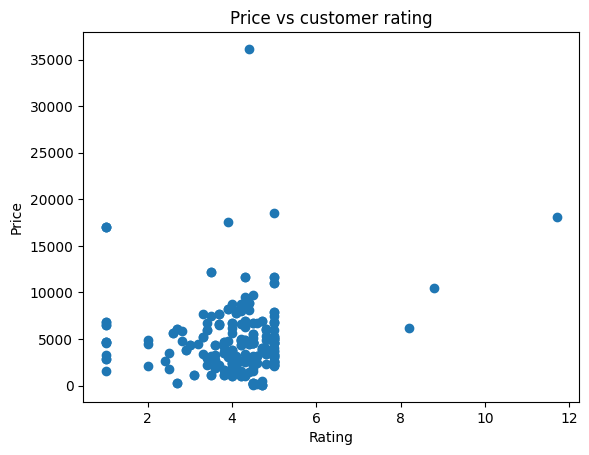

In [17]:
#Correlation between Price and Rating

plt.scatter(df["rating"], df["price"])
plt.title("Price vs customer rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()


### Insight: Limited relationship between ratings and price

The scatter plot shows no strong relationship between customer ratings and laptop prices. Higher-rated products are not consistently priced higher, suggesting that pricing decisions are driven more by brand and market positioning than customer feedback scores.


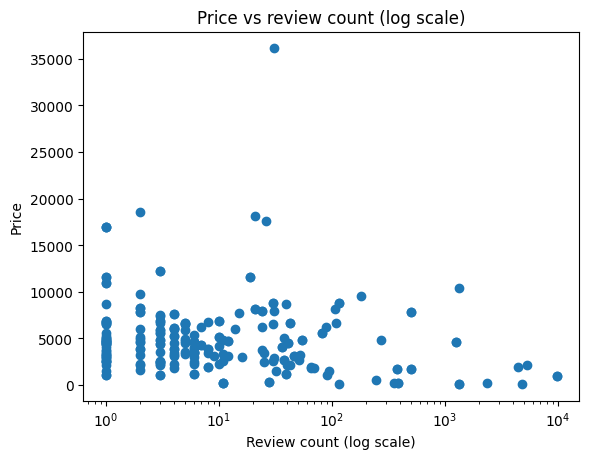

In [18]:
#Correlation between Price vs Review count

review_count = df["review_count"].copy()
review_count = review_count.where(review_count > 0)

plt.scatter(review_count, df["price"])
plt.xscale("log")
plt.title("Price vs review count (log scale)")
plt.xlabel("Review count (log scale)")
plt.ylabel("Price")
plt.show()


### Insight: Review volume does not imply premium pricing

Review count exhibits a weak and noisy relationship with price. Products with high numbers of reviews tend to cluster at lower price points, indicating that popularity does not necessarily translate into higher pricing.


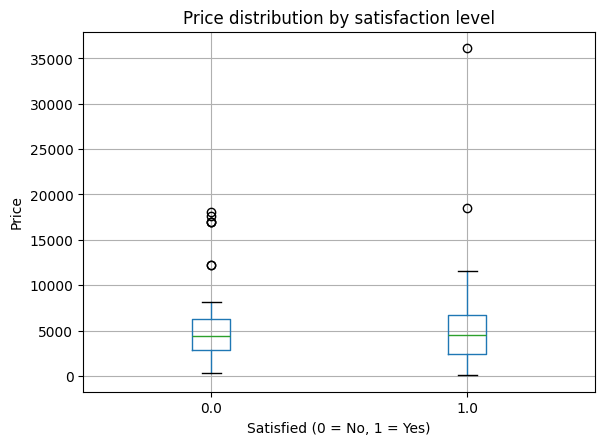

In [19]:
#Satisfaction vs Price

if "satisfied" in df.columns:  #making sure the column satisfied exists
    df.boxplot(column="price", by="satisfied")
    plt.title("Price distribution by satisfaction level")
    plt.suptitle("")
    plt.xlabel("Satisfied (0 = No, 1 = Yes)")
    plt.ylabel("Price")
    plt.show()
else:
    (Print("This does not look right..."))


### Insight: Satisfaction shows limited price differentiation

Price distributions overlap substantially across satisfaction levels, with similar medians and wide variability in both groups. This suggests that customer satisfaction alone does not meaningfully differentiate pricing tiers.
